In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/levels_fyi_salary_data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
#PARA CONVERTIR EL TIPO DE DATO A FECHA

df["timestamp"] =pd.to_datetime(df["timestamp"])

In [ ]:
#PARA CONVERTIR EL TIPO DE DATO CON EL MÉTODO .astype()
df["basesalary"] = df["basesalary"].astype(int)

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [ ]:
df.columns


Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

#LIMPIEZA

In [ ]:
#MÉTODO .drop() para eliminar columnas
#Axis es para indicar que es columna 1 = COLUMNA, 0 = ROWS
#inplace True = que los cambios ocurran en el Data Set. "Guardar los cambios"
df.drop(["rowNumber", "dmaid","cityid","stockgrantvalue","timestamp"], axis = 1, inplace = True)

In [ ]:
#REVISO LAS COMPAÑIAS ENLISTADAS PARA DECIDIR QUE COMPAÑIAS ANALIZAR

df["company"].value_counts().head(20)

Amazon            8126
Microsoft         5216
Google            4330
Facebook          2990
Apple             2028
Oracle            1128
Salesforce        1056
Intel              949
Cisco              907
IBM                907
Uber               880
Capital One        778
LinkedIn           701
VMware             657
Qualcomm           565
JPMorgan Chase     541
Bloomberg          537
Goldman Sachs      469
Intuit             449
PayPal             426
Name: company, dtype: int64

In [ ]:
#CREAMOS UNA FUNCIÓN PARA CLASIFICAR SI EL NOMBRE DE LA COMPAÑÍA PERTENECE A LA LISTA FAANG

def company_classifier(company):
  companies = ["Oracle","Salesforce","Intel","Cisco","IBM"]
  if company in companies:
    return 1
  else:
    return 0


In [ ]:
#APLICAMOS LA FUNCIÓN CON AYUDA DE APPLY Y LAMBDA

df ["companies"] = df["company"].apply(lambda x: company_classifier(x))

In [ ]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,companies
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,1
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0


#VALORES DUPLICADOS , INEXISTENTES Y OUTLIERS


In [ ]:
#REEMPLAZAR TODOS LOS VALORES VACÍOS COMO NP. NAN, NOT A NUMBER

df.replace("",np.nan, inplace = True)

In [ ]:
#VISUALIZAMOS LOS VALORES FALTANTES

df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
companies                      0
dtype: int64

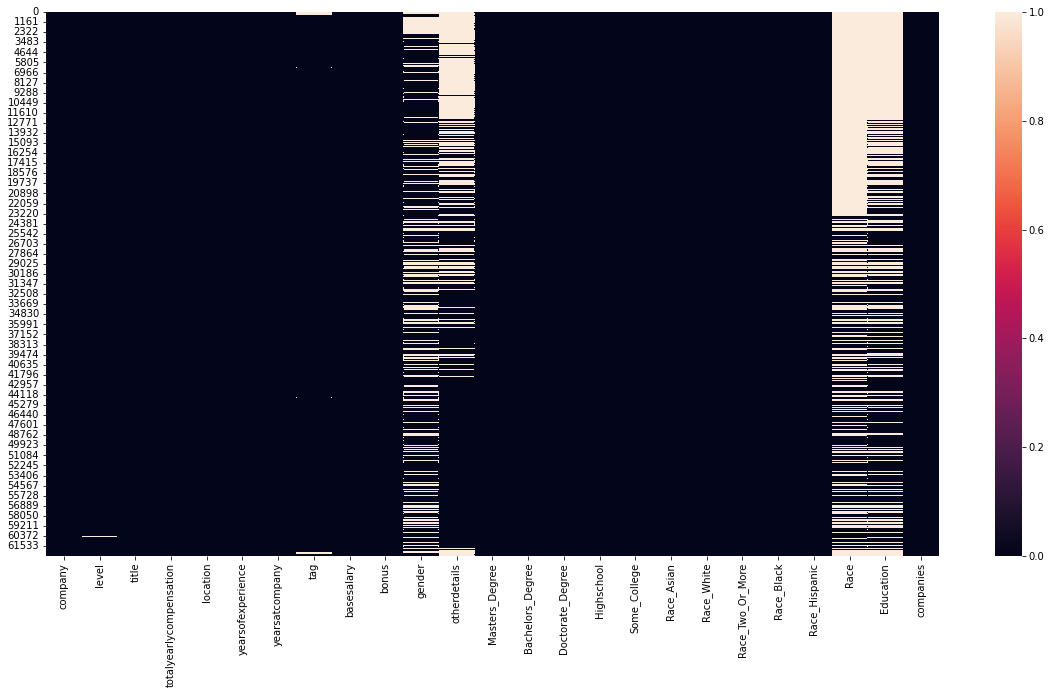

In [ ]:
#MAPA DE CALOR PARA VER NA

plt.figure(figsize = (20,10))
sns.heatmap(df.isna())
plt.show()

In [ ]:
#SUSTITUIR LOS VALORES FALTANTES POR MODA Y PROMEDIO
col_numericas = df.select_dtypes(["float64","int64"])
col_categóricas = df.select_dtypes(["object"])

In [ ]:
#RELLENO DE NAN VALORES NUMÉRICOS
for col in col_numericas.columns:
  df[col].fillna(df[col].mean(),inplace = True)

In [ ]:
#RELLENO DE NAN CATEGÓRICOS
for col in col_categóricas.columns:
  df[col].fillna(df[col].mode().values[0],inplace = True)

In [ ]:
#VERIFICAR QUE NO HAY NAN
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
companies                  0
dtype: int64

In [ ]:
#REVISAR SI HAY DUPLICADOS

df.duplicated().sum()

302

In [ ]:
#ELIMINAR DUPLICADOS

df = df.drop_duplicates()

In [ ]:
#COMPROBAR LA ELIMINACIÓN DE DUPLICADOS

df.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


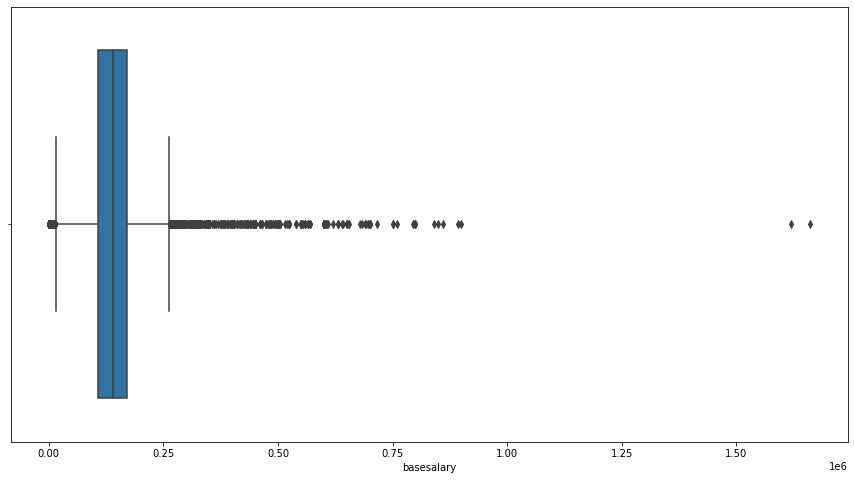

In [ ]:
#UN GRÁFICO DE CAJA PARA REVISAR LOS EXTREMOS

plt.figure(figsize = (15,8))
sns.boxplot(df.basesalary)
plt.show()

In [ ]:
#WINSORIZE

from scipy.stats.mstats import winsorize

In [ ]:
lim_inferior = 0.02
lim_superior = 0.02

In [ ]:

col_to_winsorize = ["basesalary","yearsatcompany","yearsofexperience"]

In [ ]:
#APLICAMOS EL WINSORIZE PARA NORMALIZAR DATOS

for col in col_to_winsorize:
  df[col] = winsorize(df[col], limits = [lim_inferior,lim_superior])

In [ ]:
#COMPROBAMOS QUE NO HAY OUTLINERS

df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,companies
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.136051,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.078954
std,1.381433e+05,5.593899,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.269669
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,22.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#ANÁLISIS UNIVARIABLE


In [ ]:
#FILTRO PARA TRAER SOLO A LOS FAANG

df = df[df["companies"] == 1]

In [ ]:
#MUESTREO

df.sample(5)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,companies
38856,Oracle,IC-2,Software Engineer,183000,"San Jose, CA",2.0,0.0,Networking,140000,5000.0,...,0,0,1,0,0,0,0,Asian,Master's Degree,1
57230,Cisco,Grade 8,Software Engineer,189000,"San Jose, CA",4.0,2.0,Networking,152000,18000.0,...,0,0,1,0,0,0,0,Asian,Master's Degree,1
7962,Intel,Grade 6,Hardware Engineer,130000,"Santa Clara, CA",8.0,3.0,Hardware,0,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
17378,Oracle,IC-5,Software Engineer,500000,"Atlanta, GA",20.0,2.5,Site Reliability (SRE),215000,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
43516,IBM,Band 8,Software Engineer,110000,"Philadelphia, PA",7.0,7.0,Security,110000,0.0,...,0,1,0,0,0,0,1,Hispanic,Some College,1


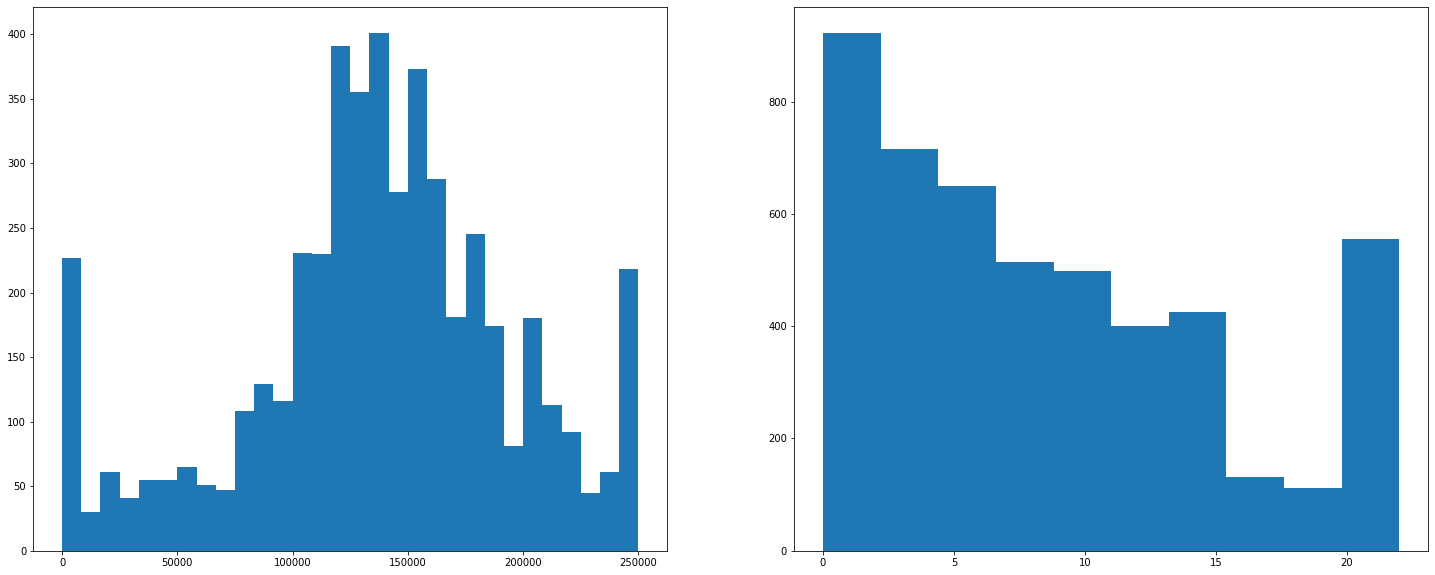

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)

plt.hist(x =df["basesalary"],bins = 30)
plt.title = ("Distribución por salario Base")

plt.subplot(1,2,2)
plt.hist(x =df["yearsofexperience"],bins = 10)
plt.title = ("Distribución por Años de Experiencia")

plt.show()

#ESTIMACIÓN DE DENSIDAD KERNEL

Análogo al Histograma pero en forma de línea para ver más claramente como se distribuye nuestra variable.

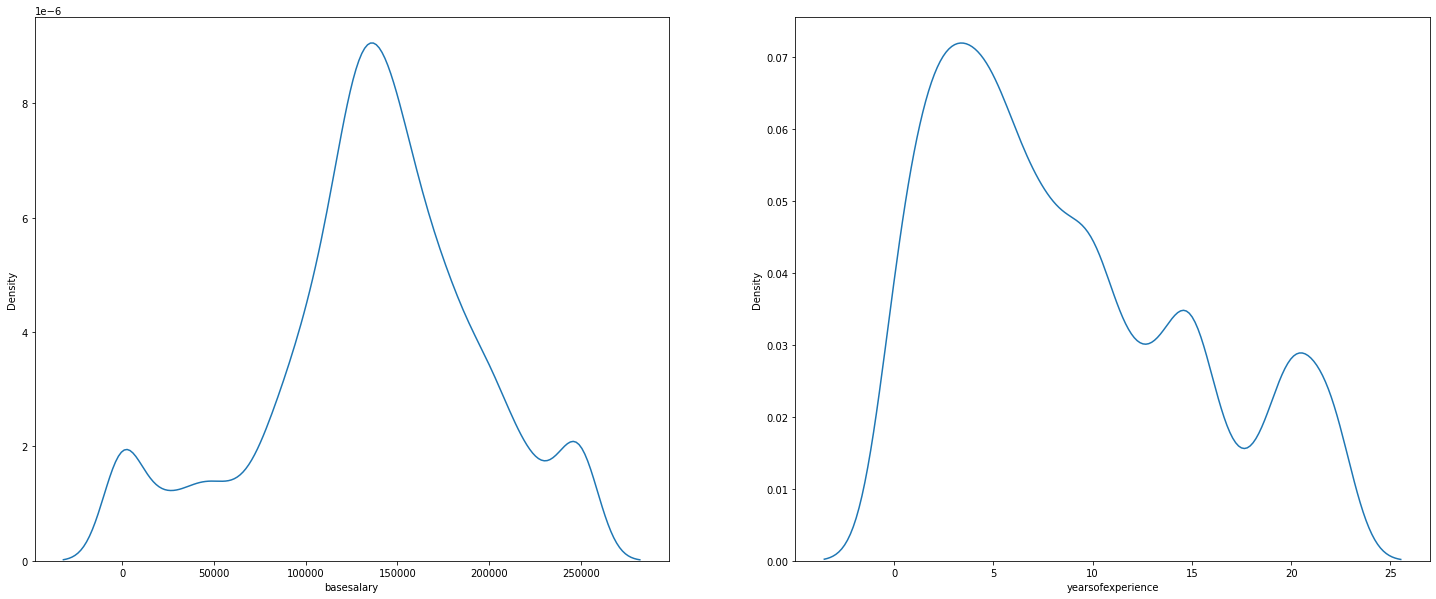

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)

sns.kdeplot(data =df, x= "basesalary")

plt.subplot(1,2,2)
sns.kdeplot(data =df, x= "yearsofexperience")

plt.show()

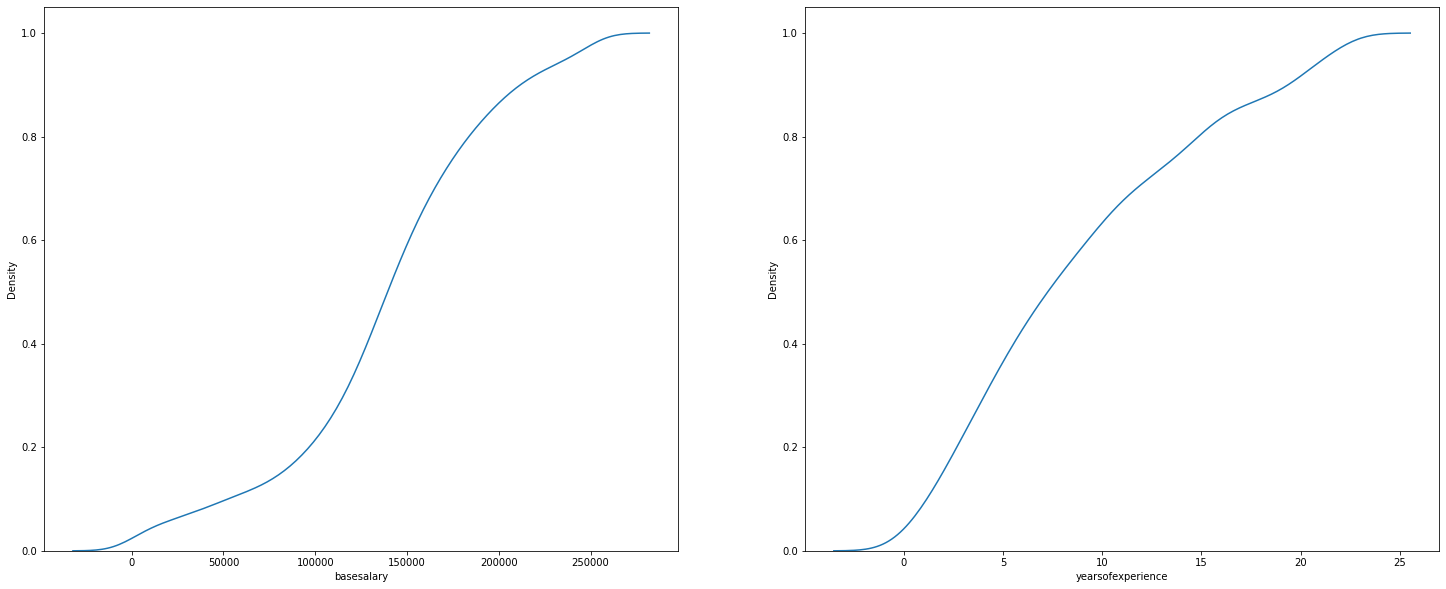

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)

sns.kdeplot(data =df, x= "basesalary", cumulative = True)
plt.title = ("Distribución por salario Base")

plt.subplot(1,2,2)
sns.kdeplot(data =df, x= "yearsofexperience", cumulative = True)
plt.title = ("Distribución por Años de Experiencia")

plt.show()

#SIMETRÍA

Indica como están distribuidos tus valores con respecto al promedio de tu distribución.

Si el coeficiente de simetria es positiva significa que tienes más valores por debajo de la media.

Si el coeficiente de simetría es negativo significa que tienes más valores por encima de la media

Esto significa que la cola se está alargando para los valores que están al final de la distribución.





#CURTOSIS

Te indica que tan plana o pronunciado puede ser el pico de tu distribución , esto quiere decir que tendrás más valores concentrados en un punto que en otro y por ende mas o menos valores aislados o outliners.


In [ ]:
#Skewness = Asimetría

col_skew_curt = ["basesalary", "yearsofexperience"]

for i in col_skew_curt:
  print( i, ":")
  print("Esta distribución tiene una asimetría de: ", df[i].skew())
  print("Esta distribución tiene una curtosis de: ", df[i].kurt())
  print("------------------------------------------")

basesalary :
Esta distribución tiene una asimetría de:  -0.383852621615062
Esta distribución tiene una curtosis de:  0.138871399680506
------------------------------------------
yearsofexperience :
Esta distribución tiene una asimetría de:  0.6005571820324725
Esta distribución tiene una curtosis de:  -0.7369370208500725
------------------------------------------


#VARIABELES CATEGÓRICAS

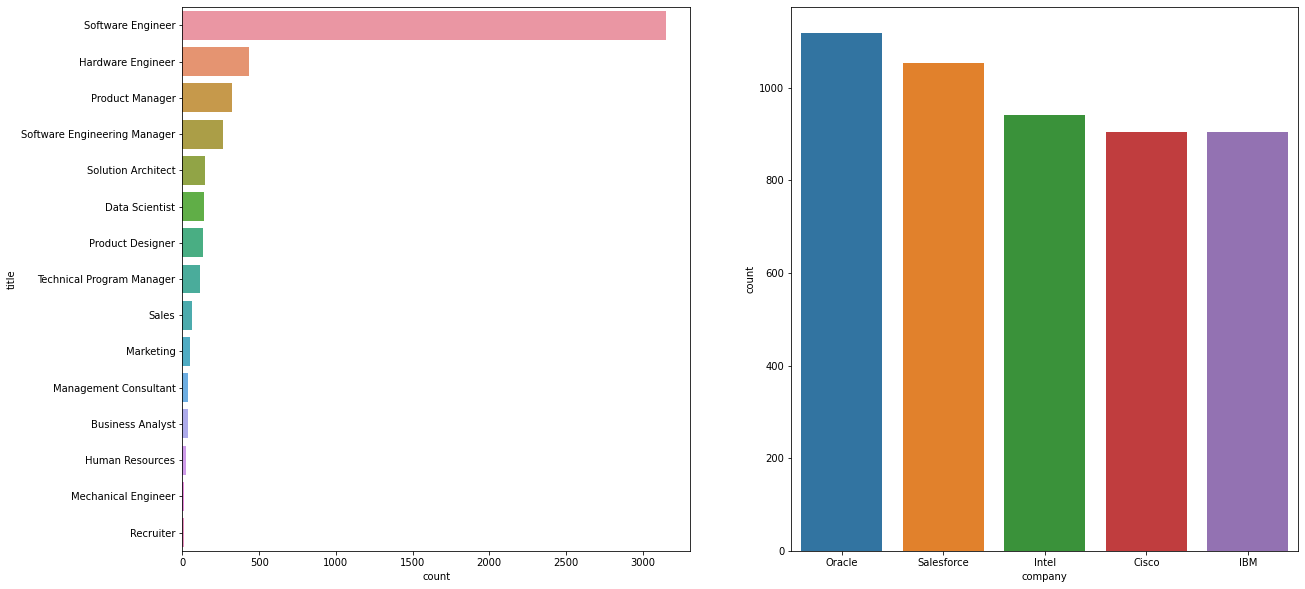

In [ ]:
# PARA REVISAR QUE PUESTO DE TRABAJO ES EL MÁS ENCUESTADO Y QUE COMPAÑIAS

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(data = df, y = "title", order = df["title"].value_counts().index)
#plt.title("Distribución de encuestados por Posición")


plt.subplot(1,2,2)
sns.countplot(data = df, x = "company", order = df["company"].value_counts().index)
#plt.title("Distribución de encuestados por Compáñia")

plt.show()




#ANÁLISIS MULTIVARIABLE

In [ ]:
#CORRELACIÓN ENTRE NUESTRAS VARIABLES

df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,companies
totalyearlycompensation,1.000000,0.489282,0.154975,0.725529,0.514934,-0.004502,-0.158312,0.047755,-0.013014,0.000384,-0.088291,-0.042954,-0.020930,-0.027910,-0.035510,NaN
yearsofexperience,0.489282,1.000000,0.570948,0.439037,0.307828,0.011411,-0.070986,-0.033817,-0.011674,0.049052,-0.079263,0.081543,-0.034313,-0.055818,-0.001875,NaN
yearsatcompany,0.154975,0.570948,1.000000,0.157582,0.192986,0.040070,-0.041765,0.026955,0.005063,0.005654,-0.027824,0.055495,-0.016968,-0.023762,0.027126,NaN
basesalary,0.725529,0.439037,0.157582,1.000000,0.425957,0.081042,-0.133016,0.077372,-0.003057,0.020503,-0.067388,0.032130,-0.012553,-0.016909,-0.021545,NaN
bonus,0.514934,0.307828,0.192986,0.425957,1.000000,0.012673,-0.048277,0.041807,-0.011370,0.002963,-0.026784,-0.004154,-0.003782,-0.000696,-0.015847,NaN
Masters_Degree,-0.004502,0.011411,0.040070,0.081042,0.012673,1.000000,-0.296567,-0.093156,-0.028959,-0.044927,0.334636,0.027947,-0.005639,0.013774,-0.008652,NaN
Bachelors_Degree,-0.158312,-0.070986,-0.041765,-0.133016,-0.048277,-0.296567,1.000000,-0.083598,-0.020849,-0.032345,0.212251,0.353581,0.121484,0.105524,0.157456,NaN
Doctorate_Degree,0.047755,-0.033817,0.026955,0.077372,0.041807,-0.093156,-0.083598,1.000000,-0.008163,-0.012664,0.055646,0.021638,0.013397,-0.007060,0.020932,NaN
Highschool,-0.013014,-0.011674,0.005063,-0.003057,-0.011370,-0.028959,-0.020849,-0.008163,1.000000,-0.003158,0.010859,0.054243,-0.004840,-0.004617,0.028892,NaN
Some_College,0.000384,0.049052,0.005654,0.020503,0.002963,-0.044927,-0.032345,-0.012664,-0.003158,1.000000,-0.035346,0.148004,0.019991,-0.007163,0.058334,NaN


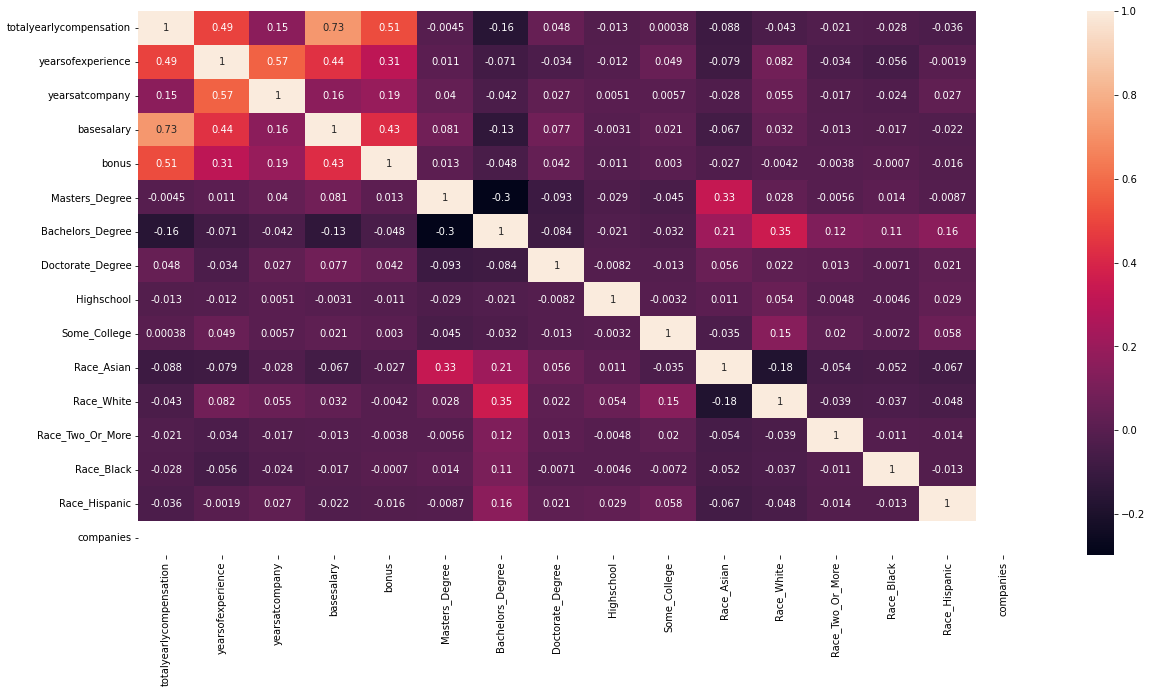

In [ ]:
#MAPA DE CALOR

plt.figure(figsize = (20,10))

sns.heatmap(df.corr(), annot = True)
#plt.title("Mapa de Correlaciones")
plt.show()

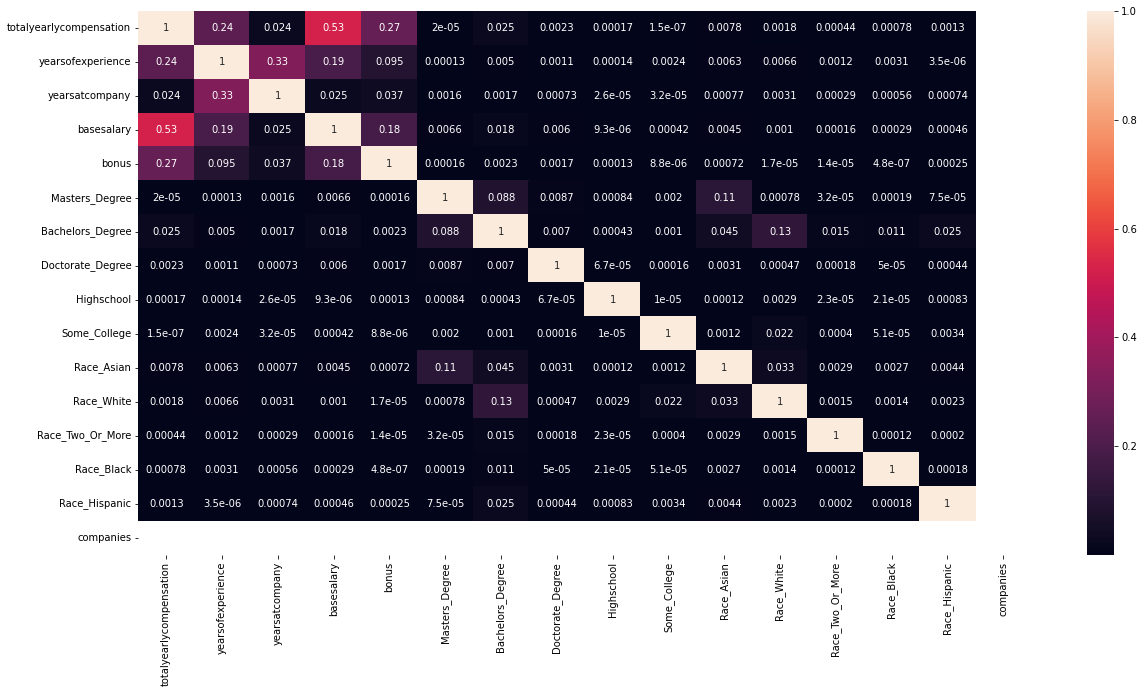

In [ ]:
#MAPA DE CALOR DE R AL CUADRADO  - FACILITA LA LECTURA DE LA CORRELACIÓN


plt.figure(figsize = (20,10))

sns.heatmap(df.corr() **2, annot = True)
#plt.title("Mapa de Correlaciones")
plt.show()

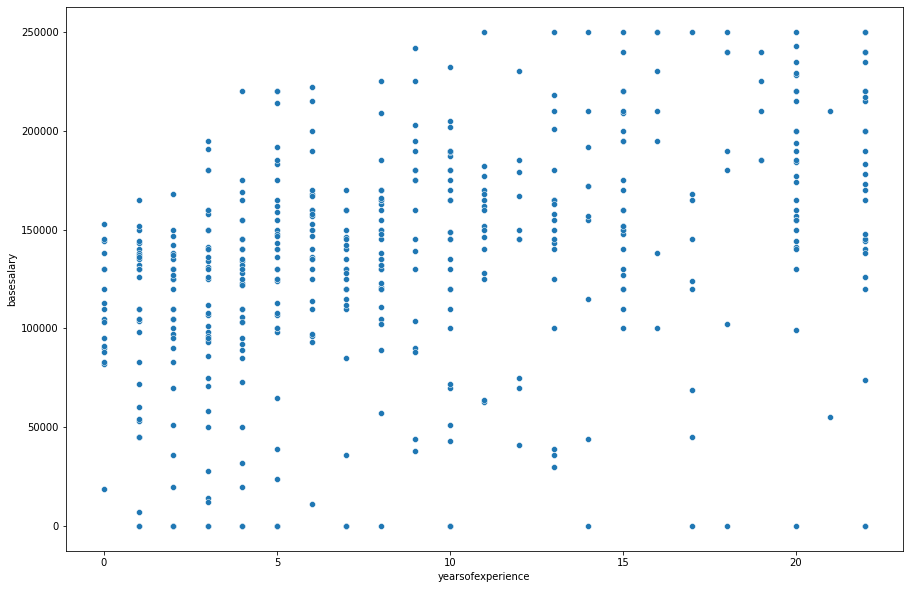

In [ ]:
#DIAGRAMA DE DISPERSIÓN A UNA MUESTRA DE 500 ALEATORIOS

#LOS DIAGRAMAS DE DISPERCIÓN SUELEN FUNCIONAR MEJOR CON MUESTRAS PEQUEÑAS


#RELACIÓN ENTRE AÑOS DE EXPERIENCIA Y SALARIO BASE

plt.figure(figsize = (15,10))

sns.scatterplot(data =df.sample(500) , x = "yearsofexperience", y = "basesalary")

plt.show()

<Figure size 1080x720 with 0 Axes>

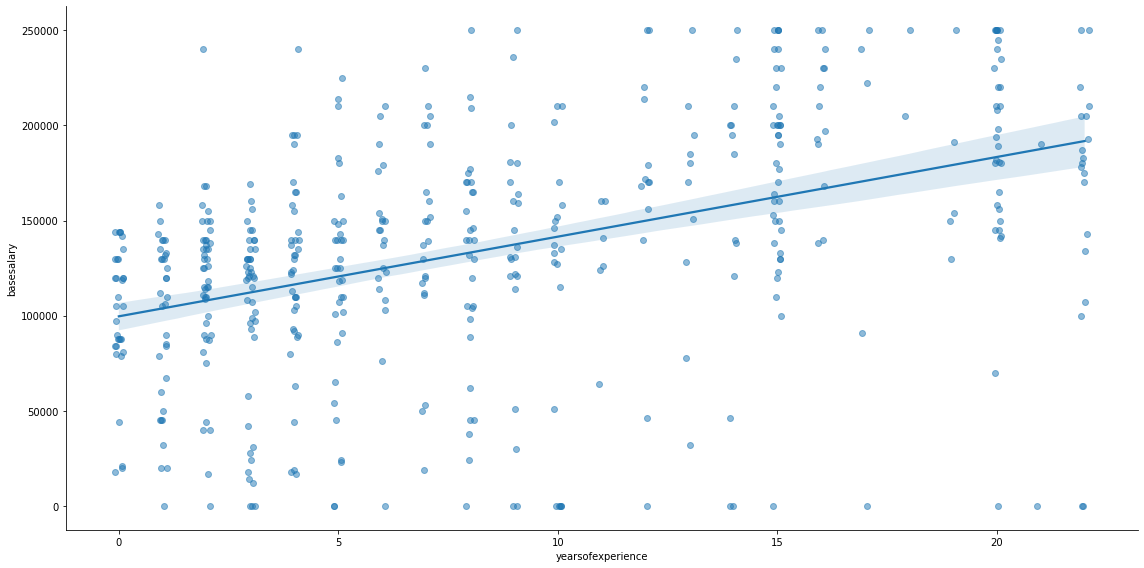

In [ ]:
#lmplot para sacar la tendencia

plt.figure(figsize = (15,10))

sns.lmplot(data =df.sample(500) , x = "yearsofexperience", y = "basesalary", height = 8, aspect = 2, scatter_kws={"alpha":0.5}, x_jitter =0.1 )

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


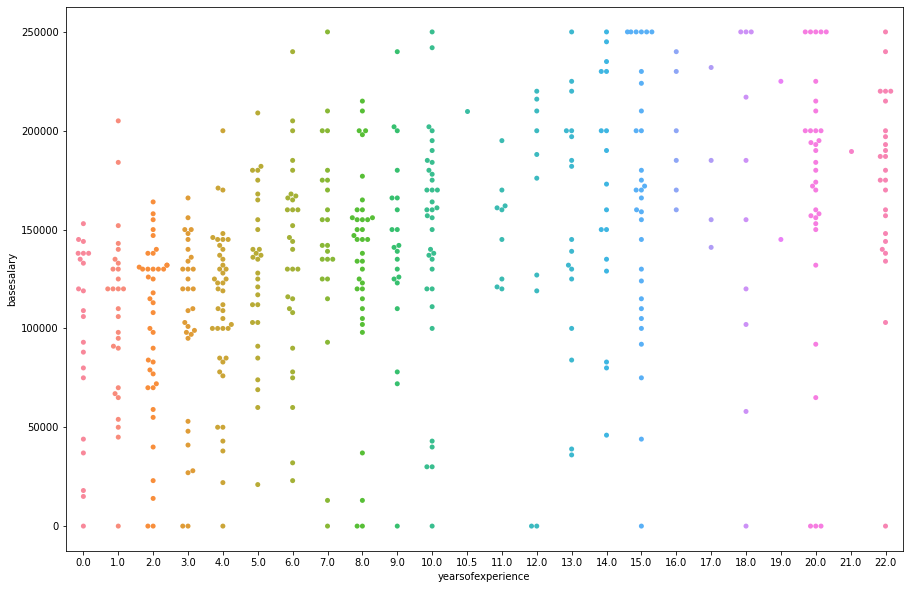

In [ ]:
#swarmplot para no amontonar los datos en absoluto tambien llamado diagrama de enjambre

plt.figure(figsize = (15,10))

sns.swarmplot(data =df.sample(500) , x = "yearsofexperience", y = "basesalary")
plt.show()

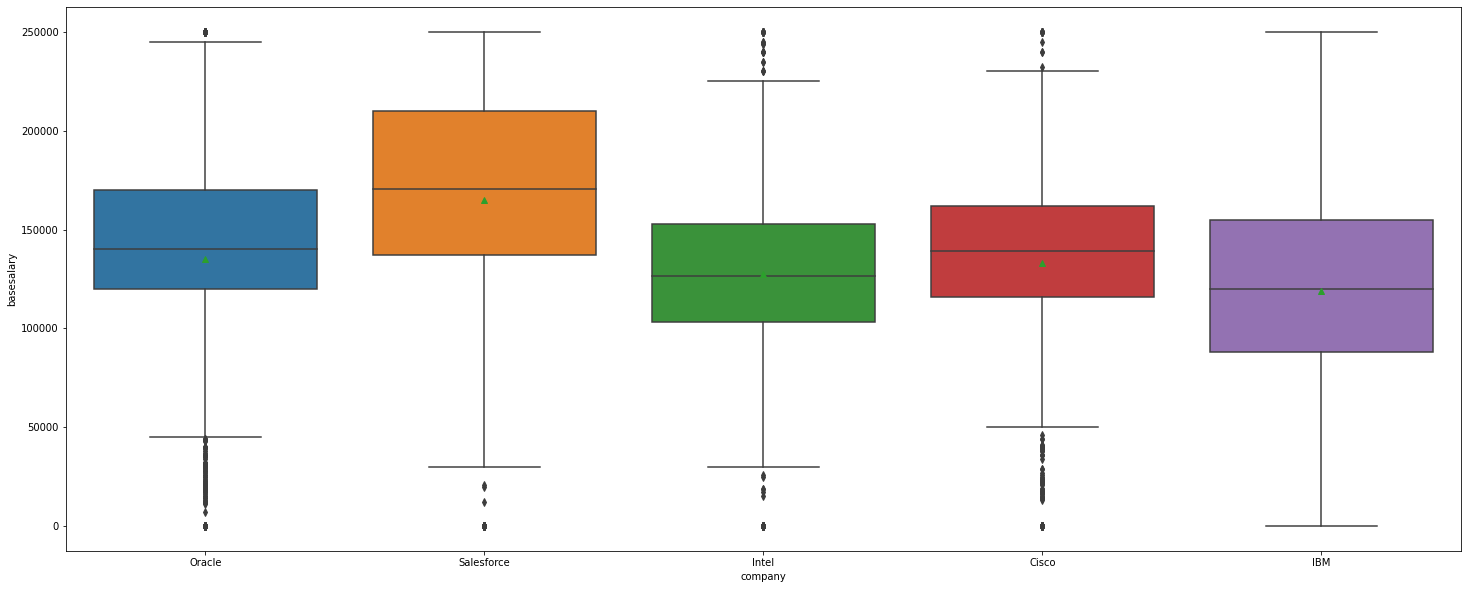

In [ ]:
#DIAGRAMA DE CAJA  , Salario base por cada compañía

plt.figure(figsize = (25,10))

sns.boxplot(data =df , x = "company", y = "basesalary", showmeans = True)
plt.show()


#ANALISIS DE DATOS CUALITATIVOS

Nube de palabras

In [ ]:
#IMPORTAMOS LA LIBRERIA QUE NOS AYUDARÁ A HACER NUBES DE PALABRAS

from wordcloud import WordCloud


In [ ]:
tag_words = ""
stop_words = {"nan","title"}

for i in df.tag:
  i =str(i)
  separate = i.split()
  for j in range(len(separate)):
    separate[j] = separate[j].lower()

  tag_words += " ".join(separate) + " "

In [ ]:
tag_words

'full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack distributed systems (back-end) api development (back-end) devops devops full stack ml / ai distributed systems (back-end) web development (front-end) full stack ml / ai networking web development (front-end) web development (front-end) networking web development (front-end) cloud api development (back-end) networking full stack distributed systems (back-end) full stack full stack full stack api development (back-end) api development (back-end) networking big data web development (front-end) web development (front-end) full stack api development (back-end) networking full stack qa / testing distributed systems (back-end) web development (front-end) networking distributed systems (back-end) dist

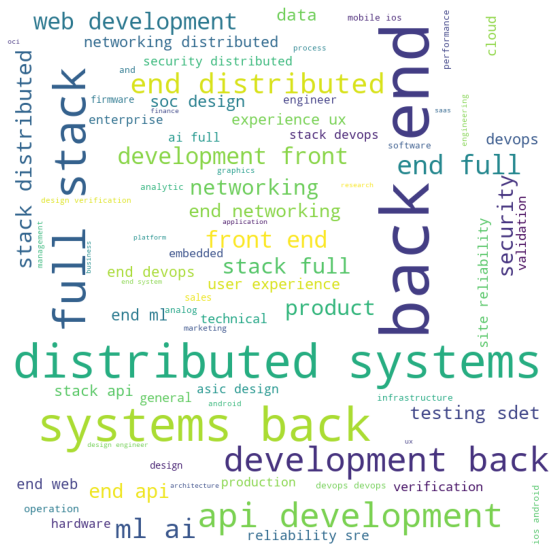

In [ ]:
wordcloud_1 = WordCloud(width = 800, height = 800, background_color = "white", stopwords = stop_words, min_font_size = 10).generate(tag_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_1)
plt.axis("off")
plt.show()